## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 위에서 5개만 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 정보를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치를 봅니다.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 예측을 합니다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 있는 Outcome 은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어 줍니다.
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있습니다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것입니다. 
따라서 0인 값을 결측치로 처리하고 시각화 해봅니다.

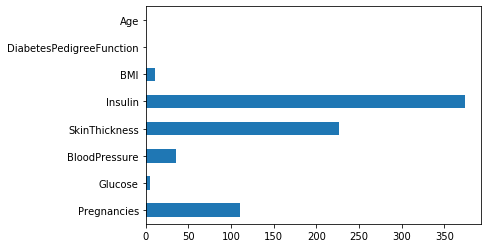

In [8]:
df[feature_columns].replace(0, np.nan).isnull().sum().plot.barh()

## target

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df_po = df[["Pregnancies", "Outcome"]].groupby(["Pregnancies"], as_index=False).mean()
df_po

,Pregnancies,Outcome
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


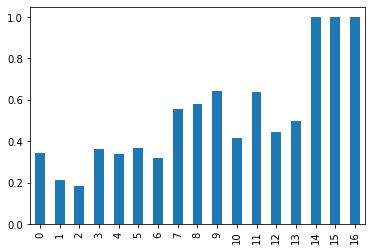

In [11]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po["Outcome"].plot.bar()

## countplot

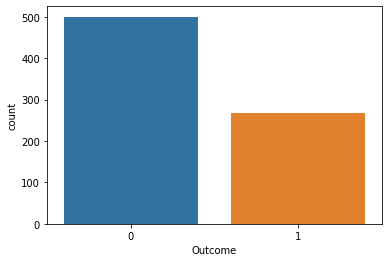

In [12]:
sns.countplot(data=df, x="Outcome")

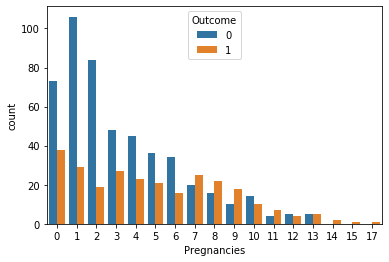

In [13]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

## barplot

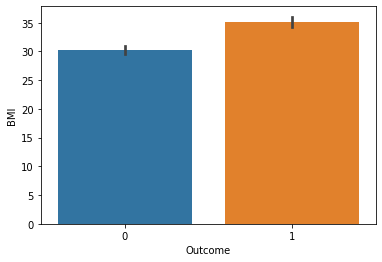

In [14]:
sns.barplot(data=df, x="Outcome", y="BMI")

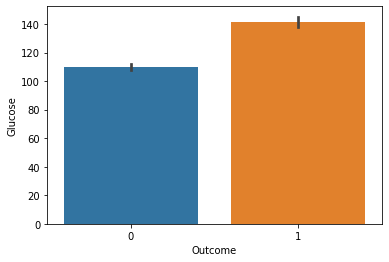

In [15]:
sns.barplot(data=df, x="Outcome", y="Glucose")

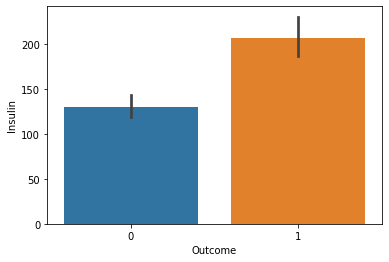

In [16]:
sns.barplot(data=df[df["Insulin"] > 0], x="Outcome", y="Insulin")

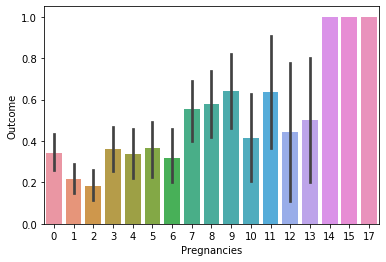

In [17]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

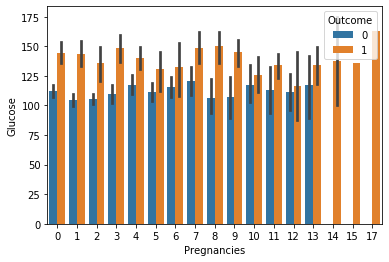

In [18]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

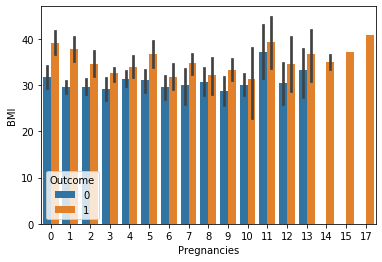

In [19]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

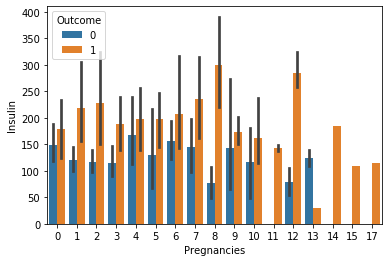

In [20]:
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## boxplot

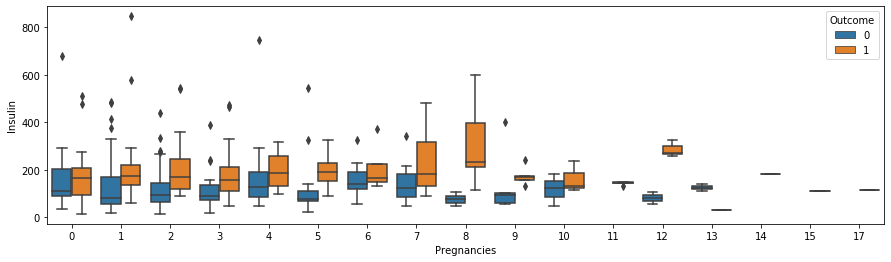

In [21]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## swarmplot

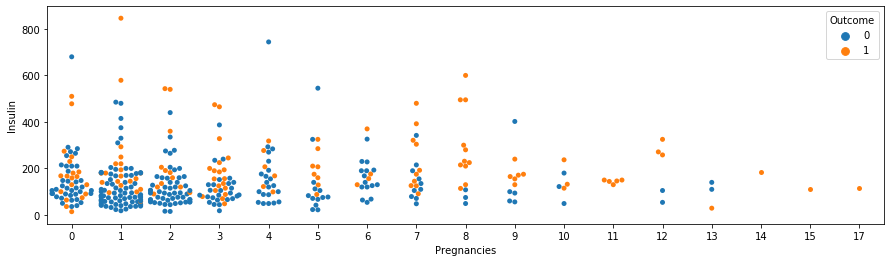

In [22]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

## distplot

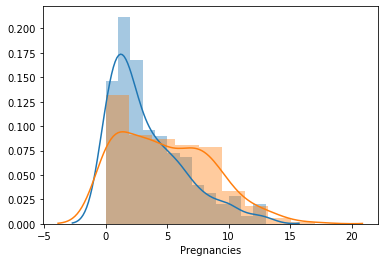

In [23]:
sns.distplot(df.loc[df["Outcome"]==0, "Pregnancies"])
sns.distplot(df.loc[df["Outcome"]==1, "Pregnancies"])

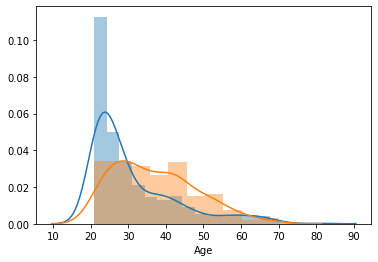

In [24]:
sns.distplot(df.loc[df["Outcome"]==0, "Age"])
sns.distplot(df.loc[df["Outcome"]==1, "Age"])

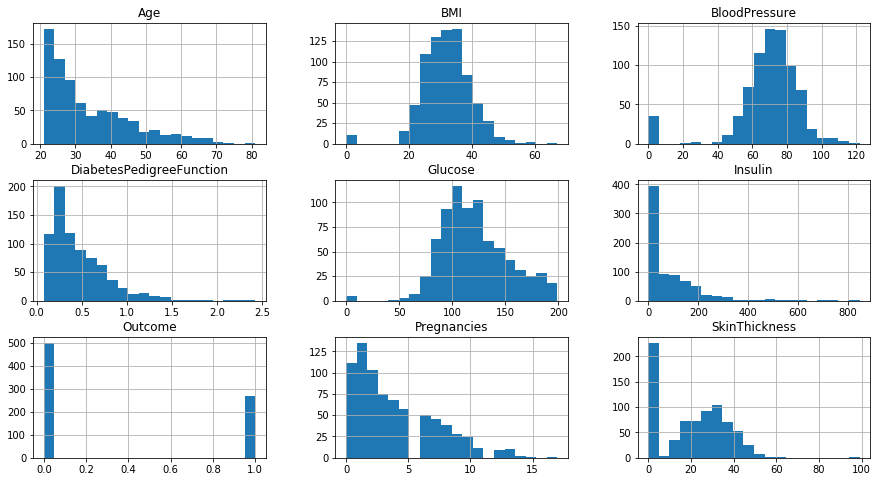

In [25]:
h = df.hist(bins=20, figsize=(15, 8))

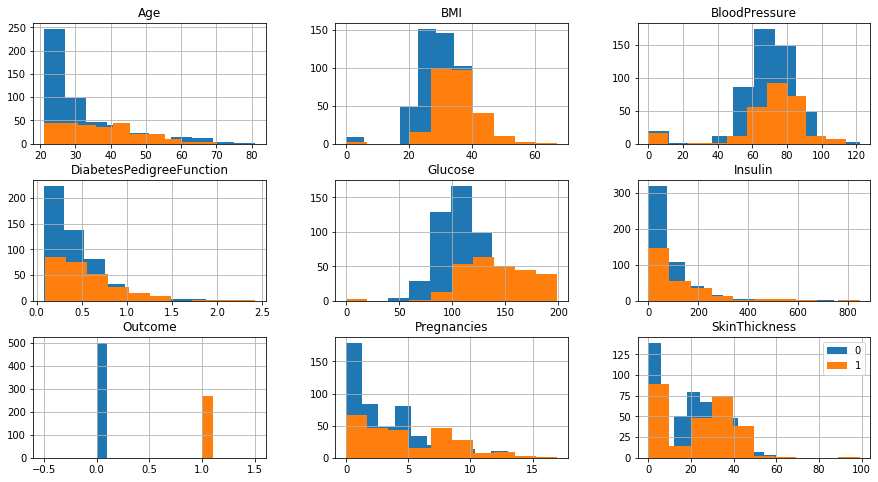

In [26]:
import matplotlib.pyplot as plt
ax = df[df["Outcome"] == 0].hist(figsize=(15, 8))
h = df[df["Outcome"] == 1].hist(figsize=(15, 8), ax=ax)
plt.legend([0, 1])

In [27]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화를 합니다.
df.columns.shape

(9,)

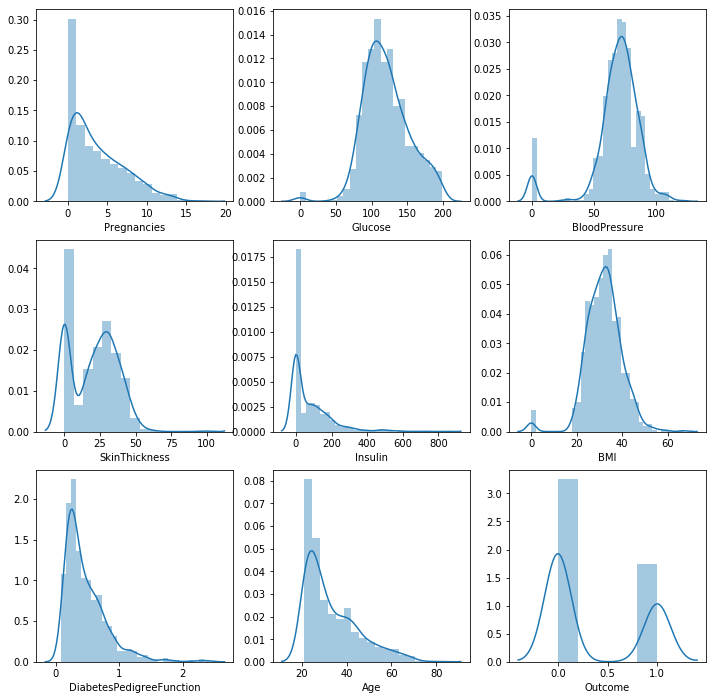

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 12)

for i, column in enumerate(df.columns):
    row = round( (i - 1) / 3)
    col = i % 3
    sns.distplot(df[column], ax=axes[row][col])

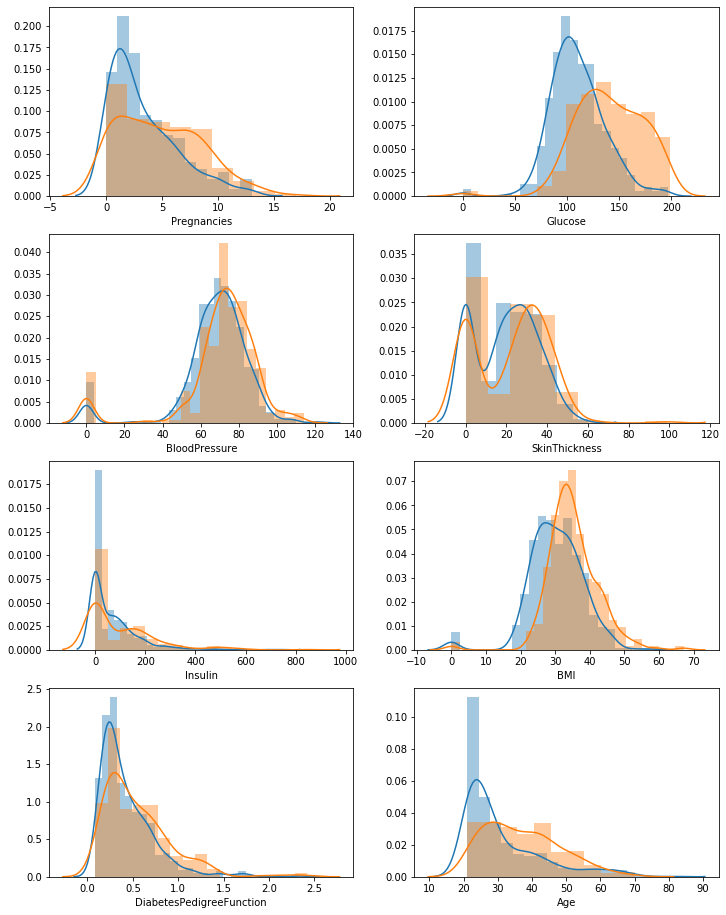

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.distplot(df.loc[df["Outcome"] == 0, column], ax=axes[row][col])
    sns.distplot(df.loc[df["Outcome"] == 1, column], ax=axes[row][col])

## violinplot

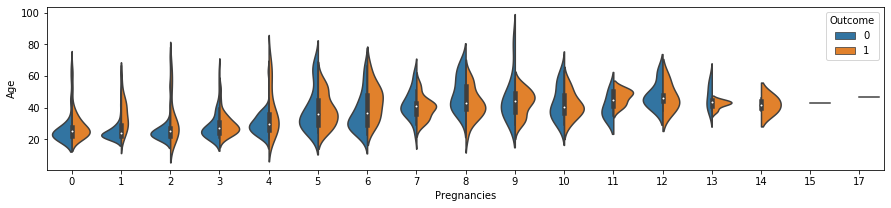

In [30]:
plt.figure(figsize=(15, 3))
sns.violinplot(data=df, x="Pregnancies", y="Age", hue="Outcome", 
               split=True)

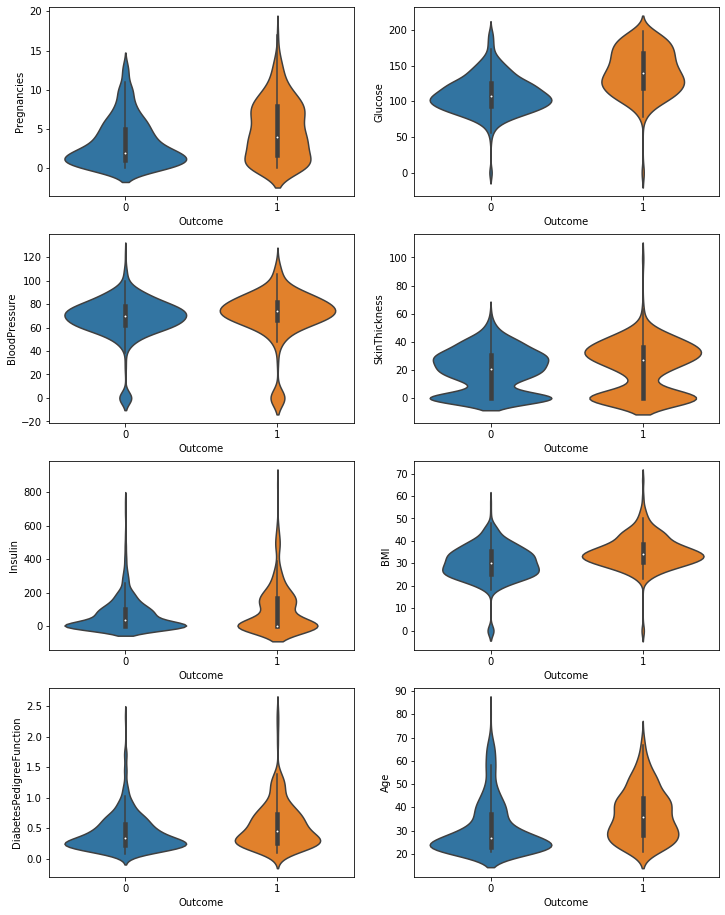

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(12, 16)

for i in range(len(feature_columns)):
    column = df.columns[i]
    row = int( i / 2)
    col = i % 2
    sns.violinplot(data = df, x="Outcome", y=column, ax=axes[row][col])

In [32]:
# 히트맵을 그려보면 Outcome 과 Glucose 가 상관계수가 가장 높다. 
# 또, Glucose 는 Insulin 과 상관계수가 높다.

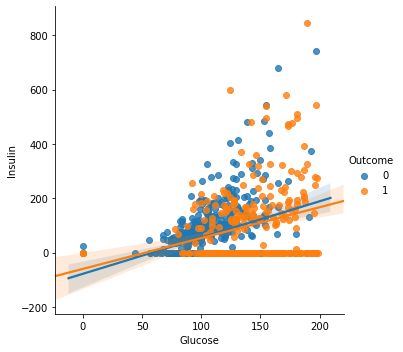

In [33]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

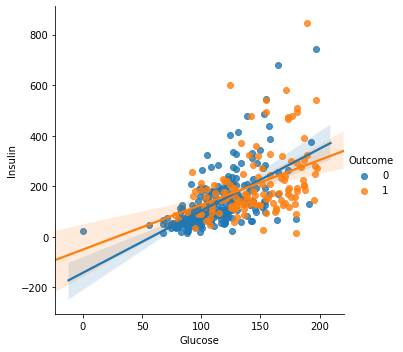

In [34]:
sns.lmplot(data=df[df["Insulin"] > 0], 
           x="Glucose", y="Insulin", hue="Outcome")

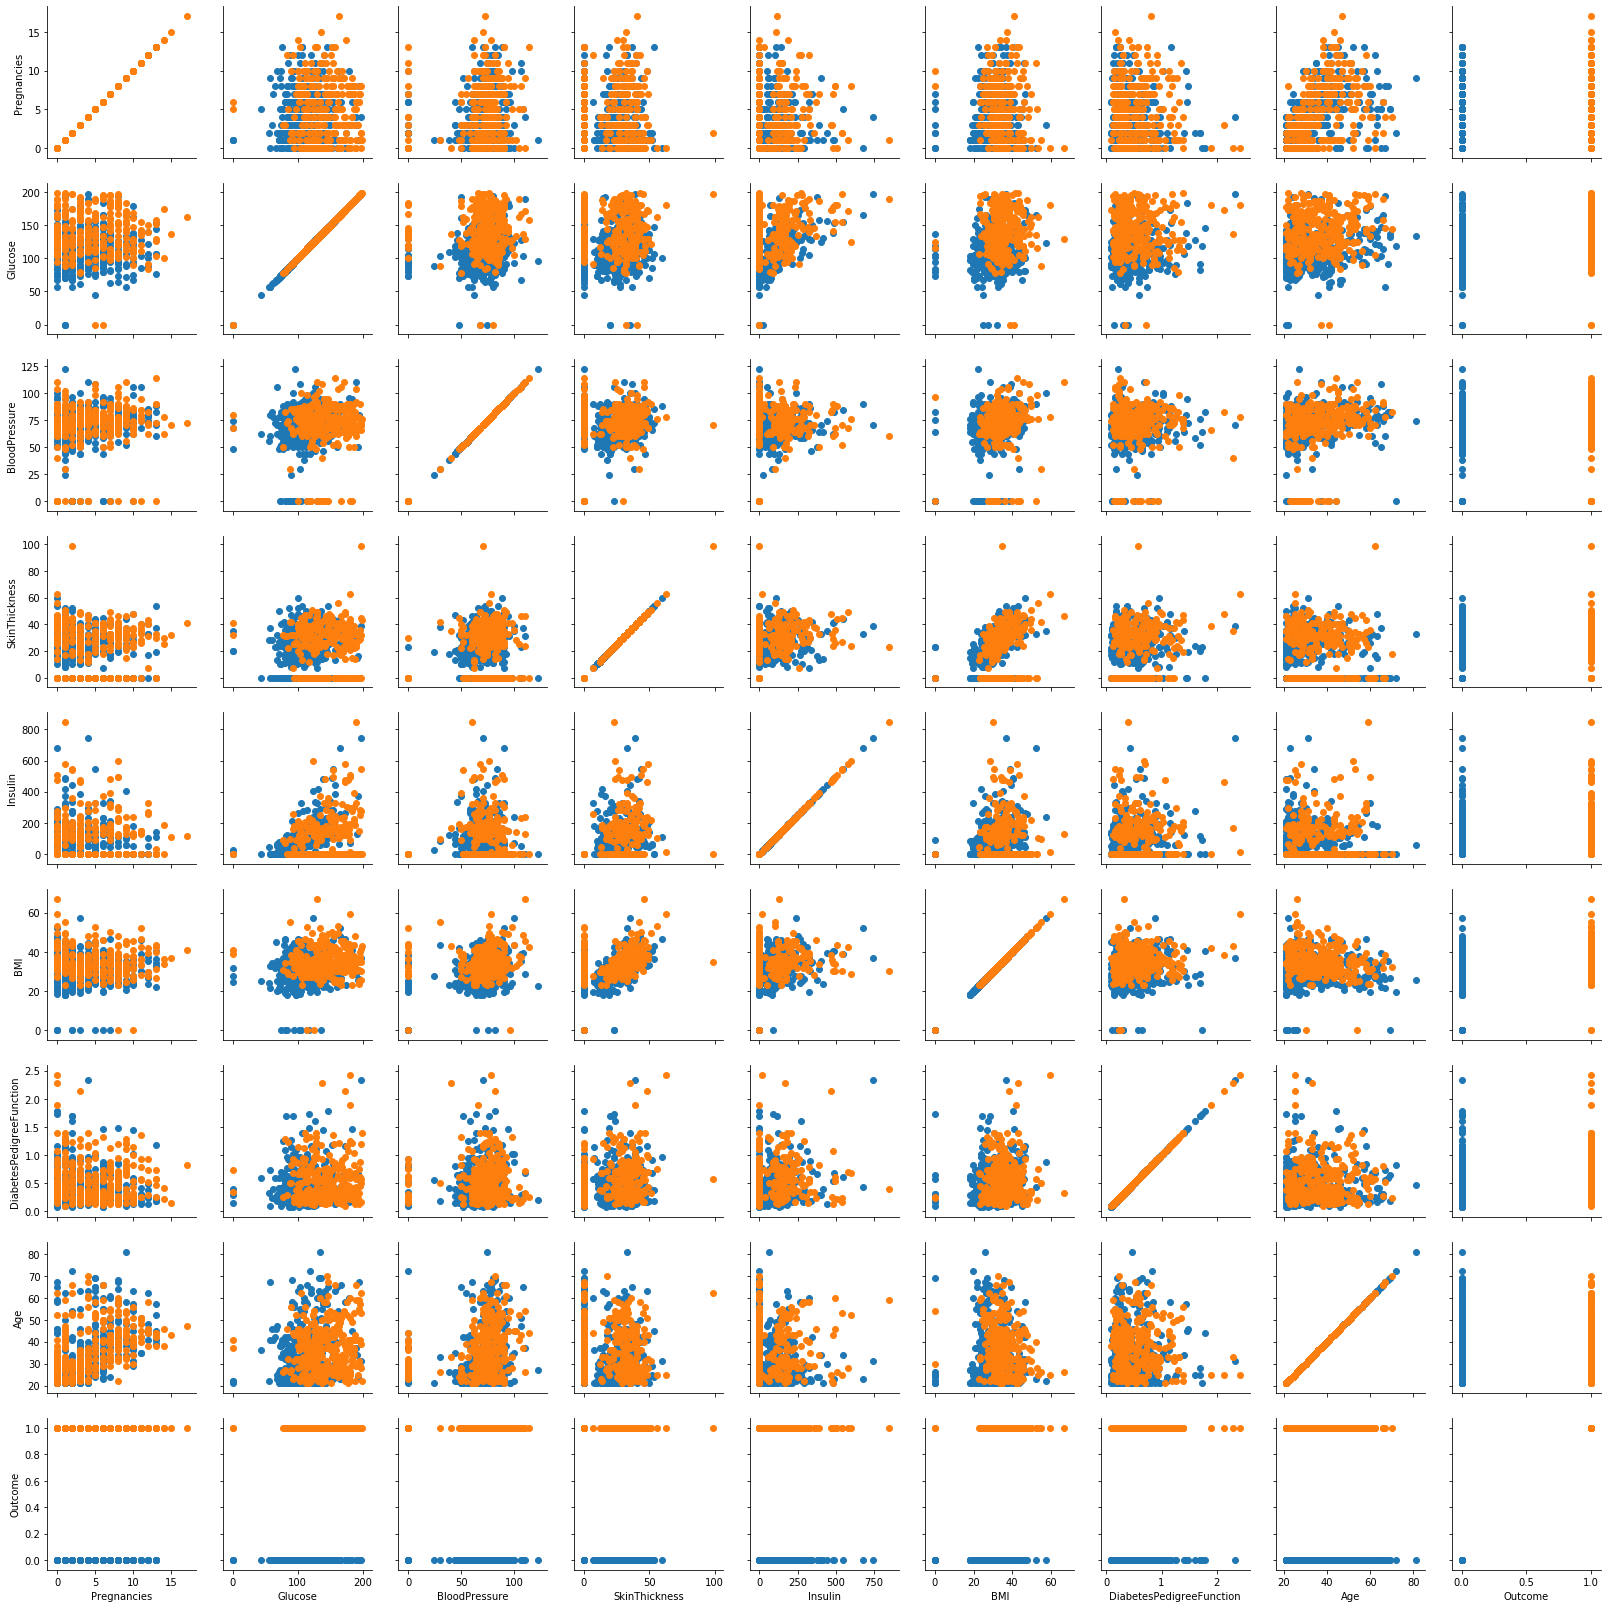

In [35]:
grid = sns.PairGrid(df, hue="Outcome")
grid.map(plt.scatter)

## 상관 분석
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)


```
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

In [36]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


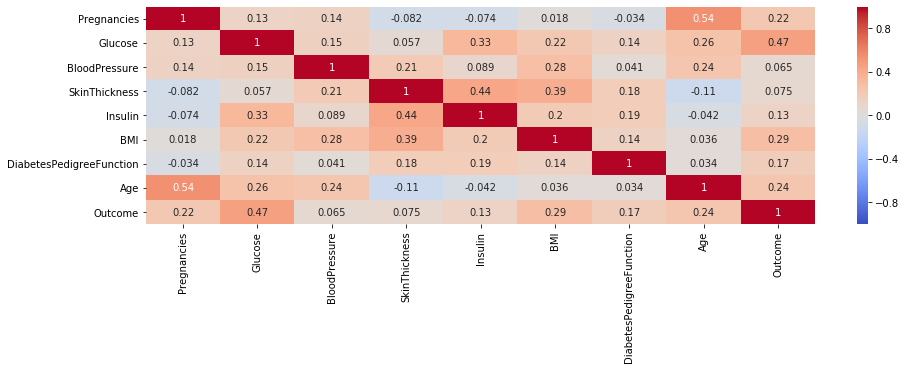

In [37]:
plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, fmt=".2g", vmax=1, vmin=-1, cmap="coolwarm")

In [38]:
corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

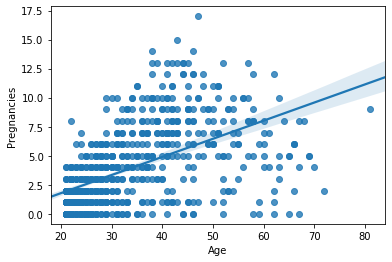

In [39]:
sns.regplot(data=df, x="Age", y="Pregnancies")

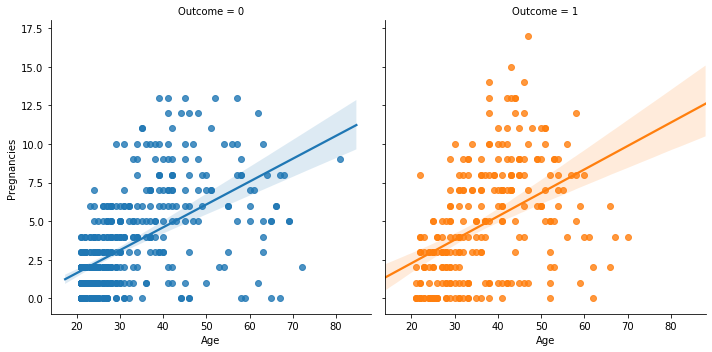

In [40]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")